# DSO105 Intermediate Stats L4 Page 10 Activity

In [1]:
## load packages
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
data = pd.read_csv('../../datasets/YouTubeChannels_Python.csv')

In [3]:
data.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


In [4]:
## determine if there is a difference in the number of views (Video views) differs between all the different grade categories (Grade).

#### only keep the two variables we will be looking at

In [6]:
data1 = data[['Gr2de', 'Video views']]

In [11]:
data1.head()

,Gr2de,Video views
0,0,20869786591
1,0,47548839843
2,0,9793305082
3,0,22675948293
4,0,26273668433


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gr2de        5000 non-null   int64
 1   Video views  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


#### ensure that Grade is categorical with levels

In [9]:
data1.Gr2de.value_counts()

3    2956
2    1993
1      41
0      10
Name: Gr2de, dtype: int64

In [12]:
dict = {0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'}

data1['Gr2deR'] = data1['Gr2de'].replace(dict)

C:\Users\nolan\AppData\Local\Temp/ipykernel_12856/2869744998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Gr2deR'] = data1['Gr2de'].replace(dict)


In [13]:
data1.head()

,Gr2de,Video views,Gr2deR
0,0,20869786591,A
1,0,47548839843,A
2,0,9793305082,A
3,0,22675948293,A
4,0,26273668433,A


### Test assumptions
#### Normality

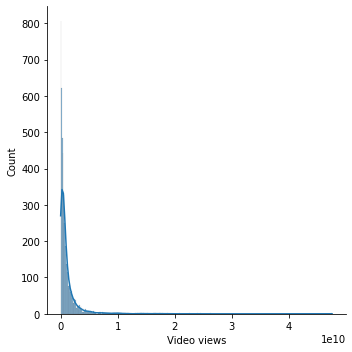

In [14]:
sns.displot(data = data1, x = "Video views", kde = True)
## positively skewed, adjust with a sqrt first

In [15]:
data1['VideoviewsSQRT'] = np.sqrt(data1['Video views'])

C:\Users\nolan\AppData\Local\Temp/ipykernel_12856/1344265979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['VideoviewsSQRT'] = np.sqrt(data1['Video views'])


In [16]:
data1.head()

,Gr2de,Video views,Gr2deR,VideoviewsSQRT
0,0,20869786591,A,144463.789896
1,0,47548839843,A,218056.964674
2,0,9793305082,A,98961.129147
3,0,22675948293,A,150585.352186
4,0,26273668433,A,162091.543373


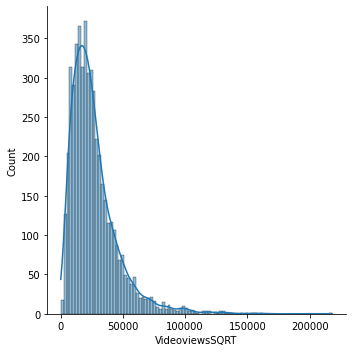

In [18]:
sns.displot(data = data1, x = "VideoviewsSQRT", kde = True)
## a little better, let's try taking the log

In [19]:
data1['VideoviewsLOG'] = np.log(data1['Video views'])

C:\Users\nolan\AppData\Local\Temp/ipykernel_12856/1114610461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['VideoviewsLOG'] = np.log(data1['Video views'])


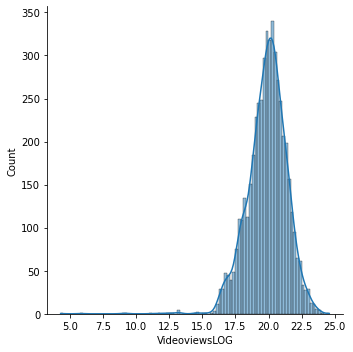

In [21]:
sns.displot(data = data1, x = "VideoviewsLOG", kde = True)
## this looks the closest to being approx. normally distributed

#### Homogeneity of Variance

In [22]:
scipy.stats.bartlett(data1['VideoviewsLOG'], data1['Gr2de'])
## violates the assumption of homogeneity of variance

BartlettResult(statistic=4642.606911455518, pvalue=0.0)

#### Analysis

In [23]:
data.dropna(inplace = True)

In [24]:
stats.f_oneway(data1['VideoviewsLOG'][data1['Gr2deR']=='A'],
                   data1['VideoviewsLOG'][data1['Gr2deR']=='B'],
               data1['VideoviewsLOG'][data1['Gr2deR']=='C'],
               data1['VideoviewsLOG'][data1['Gr2deR']=='D'])

F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

#### Post Hocs

In [26]:
postHoc = MultiComparison(data1['VideoviewsLOG'], data1['Gr2de'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5233 0.0085   -2.76 -0.2865   True
     0      2   -3.103  0.001 -4.2146 -1.9913   True
     0      3  -4.1291  0.001 -5.2399 -3.0184   True
     1      2  -1.5797  0.001  -2.133 -1.0264   True
     1      3  -2.6059  0.001 -3.1573 -2.0544   True
     2      3  -1.0262  0.001 -1.1278 -0.9245   True
----------------------------------------------------


In [28]:
data1.groupby('Gr2deR').mean()

,Gr2de,Video views,VideoviewsSQRT,VideoviewsLOG
Gr2deR,,,,
A,0.0,2.119909e+10,139631.341341,23.578544
B,1.0,6.053121e+09,70951.341638,22.055279
C,2.0,1.676207e+09,34678.089608,20.475580
D,3.0,5.265217e+08,19943.101566,19.449400


## Videos with higher ratings seem to get higher veiw counts